Describe the following Gradient Descent Algorithm:
  1. Batch Gradient Descent (BGD)
  2. Stochastic Gradient Descent (SGD)
  3. Mini-Batch Gradient Descent
  4. Gradient Descent with Momentum
  5. Nesterov Accelerated Gradient (NAG)
  6. Adagrad (Adaptive Gradient Algorithm)
  7. RMSprop (Root Mean Square Propagation)
  8. Adam (Adaptive Moment Estimation)

For each Type provide its definition, features, initialization parameters, advantages, drawback, mathematical notion and a illustration with a synthetic dataset with 1000 points with cost function calculation for each iteration and its convergence curve.



In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Synthetic Dataset
np.random.seed(0)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1)

# Add bias term to X
X_b = np.c_[np.ones((1000, 1)), X]

# Cost function (MSE)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost



---


1. **Batch Gradient Descent (BGD)**

- Definition: Calculates the gradient of the cost function using the entire training dataset in each iteration.

- Features:

  Stable convergence.

  Computationally expensive for large datasets.

  Guaranteed to converge to a local minimum (for convex cost functions) or a stationary point.

- Initialization Parameters:

  Learning rate (α)

  Initial parameter values (θ) (often initialized randomly or with zeros)

  Advantages:

  Guaranteed convergence (for convex problems)

  Provides a more accurate estimate of the gradient.

- Drawbacks:

  Slow for large datasets because it processes the entire dataset in each iteration.

  Can get stuck in local minima (for non-convex problems).

- Mathematical Notation:

  θ = θ - α * ∇J(θ)

  Where:

  θ is the parameter vector.

  α is the learning rate.

  ∇J(θ) is the gradient of the cost function J(θ) with respect to θ, calculated using the entire training dataset.



Theta found by BGD: [[4.04982473]
 [2.97474851]]


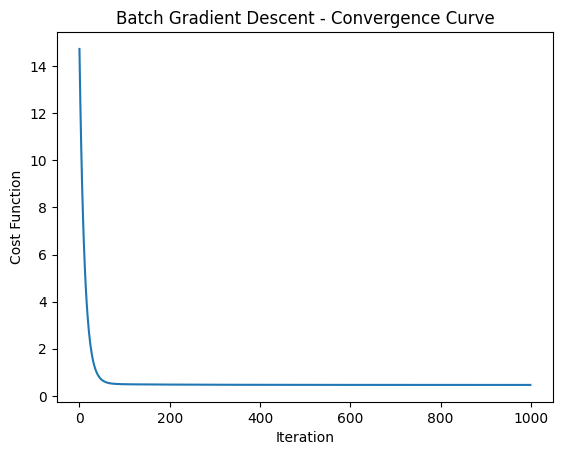

In [10]:
# Parameters initialization
theta = np.random.randn(2, 1)

# Hyperparameters
learning_rate = 0.01
n_iterations = 1000

def batch_gradient_descent(X, y, theta, learning_rate, n_iterations):
    m = len(y)
    cost_history = np.zeros(n_iterations)

    for iteration in range(n_iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)  #Gradient calculation
        theta = theta - learning_rate * gradients        #parameter update
        cost_history[iteration] = compute_cost(X, y, theta)

    return theta, cost_history

theta, cost_history = batch_gradient_descent(X_b, y, theta, learning_rate, n_iterations)

print("Theta found by BGD:", theta)

# Plot the cost function vs iterations
plt.plot(range(n_iterations), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Batch Gradient Descent - Convergence Curve")
plt.show()

2. **Stochastic Gradient Descent (SGD)**

- Definition: Calculates the gradient of the cost function using only one randomly selected data point in each iteration.

- Features:

  Very fast per iteration.

  Noisy convergence (oscillates around the minimum).

  Can escape local minima more easily.

- Initialization Parameters:

  Learning rate (α)

  Initial parameter values (θ)

- Advantages:

  Very fast iterations, especially for large datasets.

  Can escape local minima because of the noise in the updates.

- Drawbacks:

  Noisy convergence makes it hard to determine when it has converged.

  May overshoot the minimum.

- Mathematical Notation:

  θ = θ - α * ∇J(θ; x<sup>(i)</sup>, y<sup>(i)</sup>)

Where:

  θ is the parameter vector.

  α is the learning rate.

  ∇J(θ; x<sup>(i)</sup>, y<sup>(i)</sup>) is the gradient of the cost function J(θ) with respect to θ, calculated using a single data point (x<sup>(i)</sup>, y<sup>(i)</sup>).

Theta found by SGD: [[4.0085611 ]
 [2.95837813]]


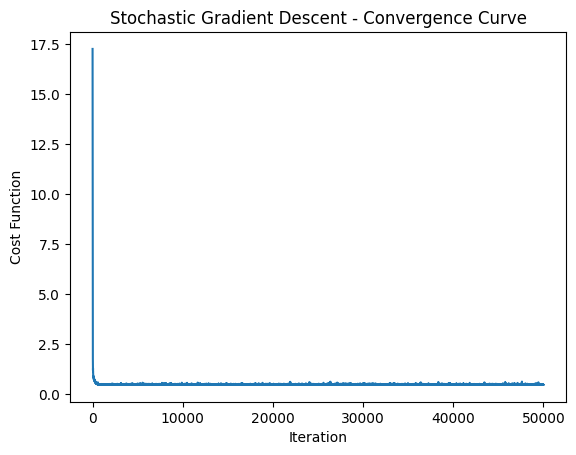

In [11]:
# Parameters initialization
theta = np.random.randn(2, 1)

# Hyperparameters
learning_rate = 0.01
n_epochs = 50

def stochastic_gradient_descent(X, y, theta, learning_rate, n_epochs):
    m = len(y)
    cost_history = np.zeros(n_epochs * m)  # Store cost for each iteration
    iteration = 0

    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)   #Gradient calculation
            theta = theta - learning_rate * gradients       #parameter update
            cost_history[iteration] = compute_cost(X, y, theta)
            iteration += 1

    return theta, cost_history

theta, cost_history = stochastic_gradient_descent(X_b, y, theta, learning_rate, n_epochs)

print("Theta found by SGD:", theta)

# Plot the cost function vs iterations
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Stochastic Gradient Descent - Convergence Curve")
plt.show()

3. **Mini-Batch Gradient Descent**

- Definition: Calculates the gradient of the cost function using a small random subset (mini-batch) of the training data in each iteration. It's a compromise between BGD and SGD.

- Features:

  Faster than BGD, more stable than SGD.

  Allows for vectorized computations (more efficient).

- Initialization Parameters:

  Learning rate (α)

  Initial parameter values (θ)

  Mini-batch size (typically 32, 64, 128, 256...)

- Advantages:

  More stable than SGD because it averages the gradients over a mini-batch.

  Faster than BGD because it doesn't use the entire dataset in each iteration.

  Leverages vectorized operations for efficiency.

- Drawbacks:

  Requires tuning the mini-batch size hyperparameter.

- Mathematical Notation:

  θ = θ - α * ∇J(θ; B<sup>(i)</sup>)

  Where:

  θ is the parameter vector.

  α is the learning rate.

  ∇J(θ; B<sup>(i)</sup>) is the gradient of the cost function J(θ) with respect to θ, calculated using a mini-batch B<sup>(i)</sup> of data points.

Theta found by Mini-Batch GD: [[4.05604262]
 [2.96833607]]


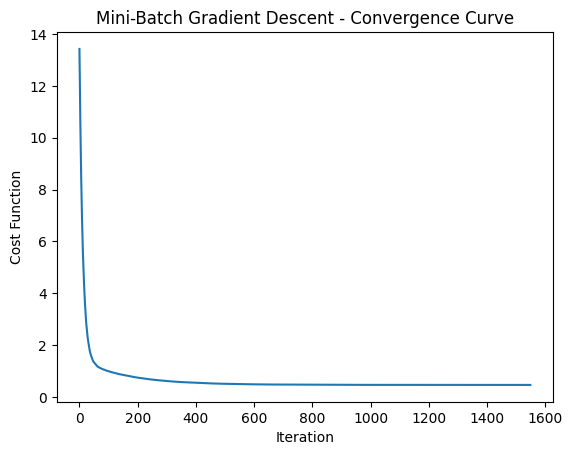

In [12]:
# Parameters initialization
theta = np.random.randn(2, 1)

# Hyperparameters
learning_rate = 0.01
n_epochs = 50
batch_size = 32

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, theta, learning_rate, n_epochs, batch_size):
    m = len(y)
    cost_history = []
    n_batches = int(m / batch_size)

    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(n_batches):
            xi = X_b_shuffled[i*batch_size:(i+1)*batch_size]
            yi = y_shuffled[i*batch_size:(i+1)*batch_size]
            gradients = (2/batch_size) * xi.T.dot(xi.dot(theta) - yi)   #Gradient Calculation
            theta = theta - learning_rate * gradients                    #Parameter update
            cost_history.append(compute_cost(X,y,theta))  # store cost after each batch

    return theta, cost_history

theta, cost_history = mini_batch_gradient_descent(X_b, y, theta, learning_rate, n_epochs, batch_size)

print("Theta found by Mini-Batch GD:", theta)

# Plot the cost function vs iterations
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Mini-Batch Gradient Descent - Convergence Curve")
plt.show()

4. **Gradient Descent with Momentum**

- Definition: Helps accelerate gradient descent by adding a "momentum" term to the update rule. It accumulates the past gradients to influence the current update. Think of it as a ball rolling down a hill – it gains momentum.

- Features:

  Faster convergence, especially in directions with small but consistent gradients.

  Reduces oscillations.

- Initialization Parameters:

  Learning rate (α)

  Initial parameter values (θ)

  Momentum coefficient (β), typically 0.9 (controls the contribution of previous gradients)

  Initial velocity (v), often initialized to zero.

- Advantages:

  Speeds up learning, especially in high-dimensional spaces and in directions with small gradients.

  Helps overcome local minima and plateaus.

  Dampens oscillations.

- Drawbacks:

  Requires tuning the momentum coefficient (β).

- Mathematical Notation:

  v<sub>t</sub> = β * v<sub>t-1</sub> + α * ∇J(θ<sub>t-1</sub>)

  θ<sub>t</sub> = θ<sub>t-1</sub> - v<sub>t</sub>

  Where:

  v<sub>t</sub> is the velocity at time step t.

  β is the momentum coefficient (0 ≤ β < 1).

  α is the learning rate.

  ∇J(θ<sub>t-1</sub>) is the gradient of the cost function at time step t-1.

  θ<sub>t</sub> is the parameter vector at time step t.

Theta found by Mini-Batch GD with Momentum: [[4.06967009]
 [2.96309021]]


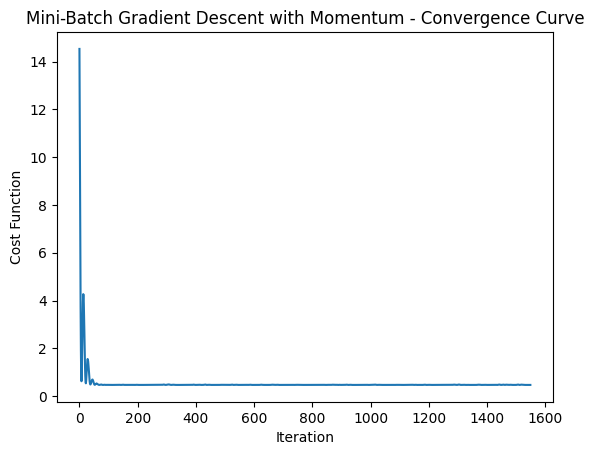

In [13]:
# Parameters initialization
theta = np.random.randn(2, 1)

# Hyperparameters
learning_rate = 0.01
n_epochs = 50
batch_size = 32
momentum = 0.9

# Mini-Batch Gradient Descent with Momentum
def mini_batch_gradient_descent_momentum(X, y, theta, learning_rate, n_epochs, batch_size, momentum):
    m = len(y)
    cost_history = []
    n_batches = int(m / batch_size)
    v = np.zeros_like(theta)  # Initialize velocity

    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(n_batches):
            xi = X_b_shuffled[i*batch_size:(i+1)*batch_size]
            yi = y_shuffled[i*batch_size:(i+1)*batch_size]
            gradients = (2/batch_size) * xi.T.dot(xi.dot(theta) - yi)     #Gradient calculation
            v = momentum * v + learning_rate * gradients                     #calculate velocity with momentum
            theta = theta - v                                                #parameter update
            cost_history.append(compute_cost(X, y, theta))               #store cost

    return theta, cost_history

theta, cost_history = mini_batch_gradient_descent_momentum(X_b, y, theta, learning_rate, n_epochs, batch_size, momentum)

print("Theta found by Mini-Batch GD with Momentum:", theta)

# Plot the cost function vs iterations
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Mini-Batch Gradient Descent with Momentum - Convergence Curve")
plt.show()

5. Nesterov Accelerated Gradient (NAG)

- Definition: A variant of gradient descent with momentum that makes a correction to the momentum step. Instead of evaluating the gradient at the current position, it estimates the next position based on momentum and evaluates the gradient there.

- Features:

  Often converges faster than standard momentum.

  More responsive to changes in the gradient.

- Initialization Parameters:

  Learning rate (α)

  Initial parameter values (θ)

  Momentum coefficient (β), typically 0.9

  Initial velocity (v), often initialized to zero.

- Advantages:

  Improved convergence speed compared to standard momentum.

  Better handling of sharp curves in the cost function.

- Drawbacks:

  Slightly more complex to implement.

  Can be less stable than standard momentum in some cases.

- Mathematical Notation:

  v<sub>t</sub> = β * v<sub>t-1</sub> + α * ∇J(θ<sub>t-1</sub> - β * v<sub>t-1</sub>)

  θ<sub>t</sub> = θ<sub>t-1</sub> - v<sub>t</sub>

  Where:

  v<sub>t</sub> is the velocity at time step t.

  β is the momentum coefficient (0 ≤ β < 1).

  α is the learning rate.

  ∇J(θ<sub>t-1</sub> - β * v<sub>t-1</sub>) is the gradient of the cost function evaluated at the "lookahead" position (θ<sub>t-1</sub> - β * v<sub>t-1</sub>).

  θ<sub>t</sub> is the parameter vector at time step t.

Theta found by Mini-Batch GD with Nesterov: [[4.07233906]
 [2.93834055]]


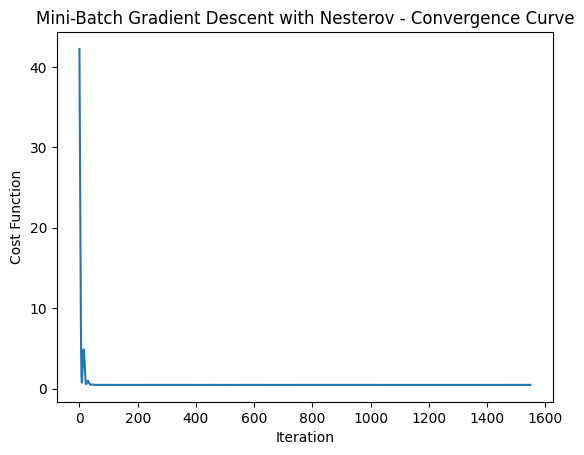

In [14]:
# Parameters initialization
theta = np.random.randn(2, 1)

# Hyperparameters
learning_rate = 0.01
n_epochs = 50
batch_size = 32
momentum = 0.9

# Mini-Batch Gradient Descent with Nesterov Acceleration
def mini_batch_gradient_descent_nesterov(X, y, theta, learning_rate, n_epochs, batch_size, momentum):
    m = len(y)
    cost_history = []
    n_batches = int(m / batch_size)
    v = np.zeros_like(theta)  # Initialize velocity

    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(n_batches):
            xi = X_b_shuffled[i*batch_size:(i+1)*batch_size]
            yi = y_shuffled[i*batch_size:(i+1)*batch_size]
            # Compute the gradient at the "lookahead" position
            theta_lookahead = theta - momentum * v
            gradients = (2/batch_size) * xi.T.dot(xi.dot(theta_lookahead) - yi)  #Gradient calculation
            v = momentum * v + learning_rate * gradients                           #calculate velocity with momentum
            theta = theta - v                                                      #parameter update
            cost_history.append(compute_cost(X, y, theta))                        #store cost

    return theta, cost_history

theta, cost_history = mini_batch_gradient_descent_nesterov(X_b, y, theta, learning_rate, n_epochs, batch_size, momentum)

print("Theta found by Mini-Batch GD with Nesterov:", theta)

# Plot the cost function vs iterations
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Mini-Batch Gradient Descent with Nesterov - Convergence Curve")
plt.show()

6. Adagrad (Adaptive Gradient Algorithm)

- Definition: Adapts the learning rate for each parameter based on the historical sum of squared gradients. Parameters that have received large gradients in the past get smaller learning rates, while parameters with small gradients get larger learning rates.

- Features:

  Parameter-specific learning rates.

  Well-suited for sparse data.

- Initialization Parameters:

  Learning rate (α)

  Initial parameter values (θ)

  A small constant (ε) to prevent division by zero (e.g., 1e-8).

- Advantages:

  Eliminates the need to manually tune the learning rate for each parameter.

  Works well for problems with sparse features.

- Drawbacks:

  The accumulated sum of squared gradients can become very large, causing the learning rate to shrink to zero, effectively stopping learning.

- Mathematical Notation:

  s<sub>t</sub> = s<sub>t-1</sub> + ∇J(θ<sub>t-1</sub>)<sup>2</sup> (element-wise square)

  θ<sub>t</sub> = θ<sub>t-1</sub> - (α / √(s<sub>t</sub> + ε)) * ∇J(θ<sub>t-1</sub>)

  Where:

  s<sub>t</sub> is the sum of squared gradients up to time step t.

  α is the initial learning rate.

  ε is a small constant to prevent division by zero.

  ∇J(θ<sub>t-1</sub>) is the gradient of the cost function at time step t-1.

  θ<sub>t</sub> is the parameter vector at time step t.



Theta found by Mini-Batch GD with Adagrad: [[3.19803923]
 [3.67577716]]


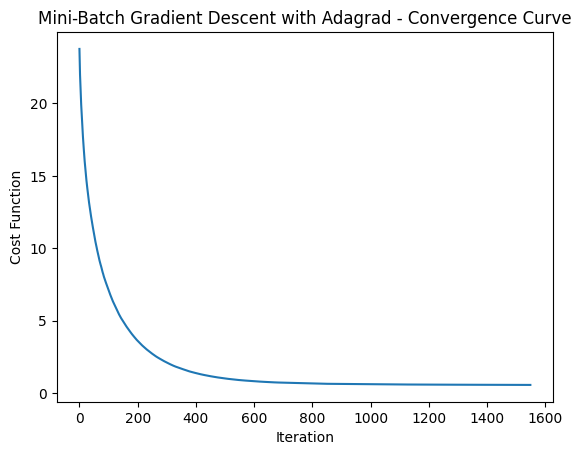

In [15]:
# Parameters initialization
theta = np.random.randn(2, 1)

# Hyperparameters
learning_rate = 0.1
n_epochs = 50
batch_size = 32
epsilon = 1e-8

# Mini-Batch Gradient Descent with Adagrad
def mini_batch_gradient_descent_adagrad(X, y, theta, learning_rate, n_epochs, batch_size, epsilon):
    m = len(y)
    cost_history = []
    n_batches = int(m / batch_size)
    s = np.zeros_like(theta)  # Initialize sum of squared gradients

    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(n_batches):
            xi = X_b_shuffled[i*batch_size:(i+1)*batch_size]
            yi = y_shuffled[i*batch_size:(i+1)*batch_size]
            gradients = (2/batch_size) * xi.T.dot(xi.dot(theta) - yi)      #Gradient calculation
            s = s + np.square(gradients)                                    #sum of squared gradients
            theta = theta - (learning_rate / (np.sqrt(s) + epsilon)) * gradients #Parameter update with adaptive learning rate
            cost_history.append(compute_cost(X, y, theta))                   #store cost

    return theta, cost_history

theta, cost_history = mini_batch_gradient_descent_adagrad(X_b, y, theta, learning_rate, n_epochs, batch_size, epsilon)

print("Theta found by Mini-Batch GD with Adagrad:", theta)

# Plot the cost function vs iterations
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Mini-Batch Gradient Descent with Adagrad - Convergence Curve")
plt.show()

7. RMSprop (Root Mean Square Propagation)

- Definition: Similar to Adagrad, RMSprop adapts the learning rate for each parameter. However, instead of accumulating all past squared gradients, it uses an exponentially decaying average of past squared gradients. This helps to prevent the learning rate from shrinking to zero too quickly.

- Features:

  Parameter-specific learning rates.

  Addresses Adagrad's vanishing learning rate problem.

- Initialization Parameters:

  Learning rate (α)

  Initial parameter values (θ)

  Decay rate (ρ), typically 0.9 (controls the contribution of past squared gradients)

  A small constant (ε) to prevent division by zero (e.g., 1e-8).

- Advantages:

  Faster convergence than Adagrad.

  More robust to the choice of initial learning rate.

- Drawbacks:

  Requires tuning the decay rate (ρ).

- Mathematical Notation:

  s<sub>t</sub> = ρ * s<sub>t-1</sub> + (1 - ρ) * ∇J(θ<sub>t-1</sub>)<sup>2</sup> (element-wise square)

  θ<sub>t</sub> = θ<sub>t-1</sub> - (α / √(s<sub>t</sub> + ε)) * ∇J(θ<sub>t-1</sub>)

  Where:

  s<sub>t</sub> is the exponentially decaying average of squared gradients up to time step t.

  ρ is the decay rate (0 ≤ ρ < 1).

  α is the learning rate.

  ε is a small constant to prevent division by zero.

  ∇J(θ<sub>t-1</sub>) is the gradient of the cost function at time step t-1.

  θ<sub>t</sub> is the parameter vector at time step t.

Theta found by Mini-Batch GD with RMSprop: [[4.16480178]
 [3.06309916]]


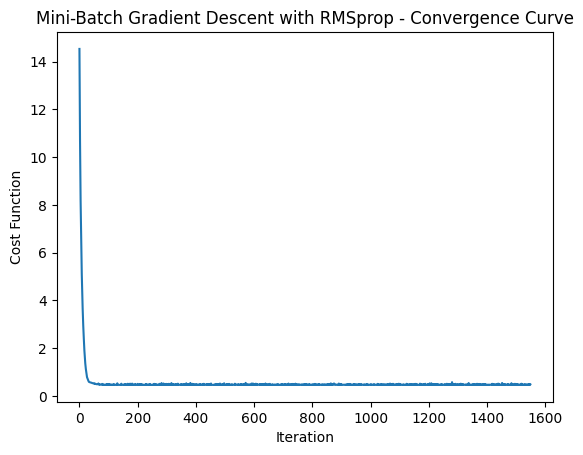

In [16]:
# Parameters initialization
theta = np.random.randn(2, 1)

# Hyperparameters
learning_rate = 0.1
n_epochs = 50
batch_size = 32
rho = 0.9
epsilon = 1e-8

# Mini-Batch Gradient Descent with RMSprop
def mini_batch_gradient_descent_rmsprop(X, y, theta, learning_rate, n_epochs, batch_size, rho, epsilon):
    m = len(y)
    cost_history = []
    n_batches = int(m / batch_size)
    s = np.zeros_like(theta)  # Initialize exponentially decaying average of squared gradients

    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(n_batches):
            xi = X_b_shuffled[i*batch_size:(i+1)*batch_size]
            yi = y_shuffled[i*batch_size:(i+1)*batch_size]
            gradients = (2/batch_size) * xi.T.dot(xi.dot(theta) - yi) #Gradient Calculation
            s = rho * s + (1 - rho) * np.square(gradients)             #Exponentially decaying average of squared gradients
            theta = theta - (learning_rate / (np.sqrt(s) + epsilon)) * gradients  #Parameter update with adaptive learning rate
            cost_history.append(compute_cost(X, y, theta))                   #store cost

    return theta, cost_history

theta, cost_history = mini_batch_gradient_descent_rmsprop(X_b, y, theta, learning_rate, n_epochs, batch_size, rho, epsilon)

print("Theta found by Mini-Batch GD with RMSprop:", theta)

# Plot the cost function vs iterations
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Mini-Batch Gradient Descent with RMSprop - Convergence Curve")
plt.show()

8. Adam (Adaptive Moment Estimation)

- Definition: Combines the ideas of momentum and RMSprop. It computes adaptive learning rates for each parameter based on both the first moment (mean) and the second moment (uncentered variance) of the gradients.

- Features:

  Parameter-specific learning rates.

  Combines momentum and adaptive learning rates.

  Generally robust and effective across a wide range of problems.

- Initialization Parameters:

  Learning rate (α)

  Initial parameter values (θ)

  Decay rate for the first moment (β1), typically 0.9

  Decay rate for the second moment (β2), typically 0.999

  A small constant (ε) to prevent division by zero (e.g., 1e-8).

- Advantages:

  Generally requires less tuning than other adaptive learning rate methods.

  Often converges quickly and effectively.

- Drawbacks:

  More complex to implement than simpler methods.

- Mathematical Notation:

  m<sub>t</sub> = β<sub>1</sub> * m<sub>t-1</sub> + (1 - β<sub>1</sub>) * ∇J(θ<sub>t-1</sub>)

  v<sub>t</sub> = β<sub>2</sub> * v<sub>t-1</sub> + (1 - β<sub>2</sub>) * ∇J(θ<sub>t-1</sub>)<sup>2</sup> (element-wise square)

  m̂<sub>t</sub> = m<sub>t</sub> / (1 - β<sub>1</sub><sup>t</sup>) (Bias correction for first moment)

  v̂<sub>t</sub> = v<sub>t</sub> / (1 - β<sub>2</sub><sup>t</sup>) (Bias correction for second moment)

  θ<sub>t</sub> = θ<sub>t-1</sub> - (α / √(v̂<sub>t</sub> + ε)) * m̂<sub>t</sub>

  Where:

  m<sub>t</sub> is the exponentially decaying average of past gradients (first moment).

  v<sub>t</sub> is the exponentially decaying average of past squared gradients (second moment).

  β<sub>1</sub> and β<sub>2</sub> are the decay rates for the first and second moments, respectively.

  m̂<sub>t</sub> and v̂<sub>t</sub> are the bias-corrected first and second moment estimates. These are crucial, especially in the early iterations.

  α is the learning rate.

  ε is a small constant to prevent division by zero.

  ∇J(θ<sub>t-1</sub>) is the gradient of the cost function at time step t-1.

  θ<sub>t</sub> is the parameter vector at time step t.

Theta found by Mini-Batch GD with Adam: [[4.07888682]
 [2.96750647]]


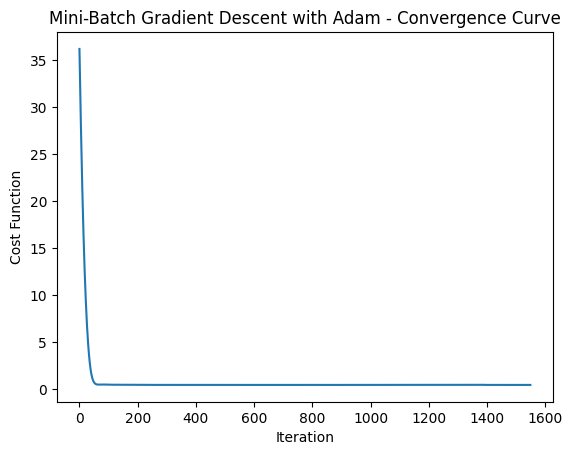

In [18]:
# Parameters initialization
theta = np.random.randn(2, 1)

# Hyperparameters
learning_rate = 0.1
n_epochs = 50
batch_size = 32
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Mini-Batch Gradient Descent with Adam
def mini_batch_gradient_descent_adam(X, y, theta, learning_rate, n_epochs, batch_size, beta1, beta2, epsilon):
    m = len(y)
    cost_history = []
    n_batches = int(m / batch_size)
    m_t = np.zeros_like(theta)  # Initialize first moment vector
    v_t = np.zeros_like(theta)  # Initialize second moment vector
    t = 0  # Time step

    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(n_batches):
            xi = X_b_shuffled[i*batch_size:(i+1)*batch_size]
            yi = y_shuffled[i*batch_size:(i+1)*batch_size]
            gradients = (2/batch_size) * xi.T.dot(xi.dot(theta) - yi)  #Gradient calculation
            t += 1

            # Update biased first moment estimate
            m_t = beta1 * m_t + (1 - beta1) * gradients
            # Update biased second moment estimate
            v_t = beta2 * v_t + (1 - beta2) * np.square(gradients)

            # Correct bias in first moment estimate
            m_hat = m_t / (1 - beta1**t)
            # Correct bias in second moment estimate
            v_hat = v_t / (1 - beta2**t)

            # Update parameters
            theta = theta - (learning_rate / (np.sqrt(v_hat) + epsilon)) * m_hat

            cost_history.append(compute_cost(X, y, theta))  # Store cost for each iteration

    return theta, cost_history

theta, cost_history = mini_batch_gradient_descent_adam(X_b, y, theta, learning_rate, n_epochs, batch_size, beta1, beta2, epsilon)

print("Theta found by Mini-Batch GD with Adam:", theta)

# Plot the cost function vs iterations
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Mini-Batch Gradient Descent with Adam - Convergence Curve")
plt.show()